Importing necessary libraries and creation of model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set the path to the training and validation directories
train_dir = '/content/gdrive/MyDrive/dogs-vs-cats/train'
validation_dir = '/content/gdrive/MyDrive/dogs-vs-cats/test'

# Set the number of epochs and batch size
epochs = 40
batch_size = 32

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a new classification head
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)

# Create a new model
model = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile the model with RMSprop optimizer
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

Mounted at /content/gdrive
58889256/58889256 [==============================] - 0s 0us/step
Found 1061 images belonging to 2 classes.
Found 1009 images belonging to 2 classes.
Epoch 1/40
34/34 [==============================] - 334s 10s/step - loss: 0.6450 - accuracy: 0.6635 - val_loss: 0.6018 - val_accuracy: 0.7849
Epoch 2/40
34/34 [==============================] - 39s 1s/step - loss: 0.5755 - accuracy: 0.7908 - val_loss: 0.5508 - val_accuracy: 0.8038
Epoch 3/40
34/34 [==============================] - 39s 1s/step - loss: 0.5278 - accuracy: 0.8313 - val_loss: 0.5119 - val_accuracy: 0.8345
Epoch 4/40
34/34 [==============================] - 38s 1s/step - loss: 0.4861 - accuracy: 0.8483 - val_loss: 0.4828 - val_accuracy: 0.8385
Epoch 5/40
34/34 [==============================] - 38s 1s/step - loss: 0.4575 - accuracy: 0.8567 - val_loss: 0.4567 - val_accuracy: 0.8414
Epoch 6/40
34/34 [==============================] - 38s 1s/step - loss: 0.4306 - accuracy: 0.8737 - val_loss: 0.4363 - val

Evaluating the model

In [2]:
# Evaluate the model
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Training accuracy: 0.9198868870735168
Validation accuracy: 0.9028741121292114


Plotting the graph

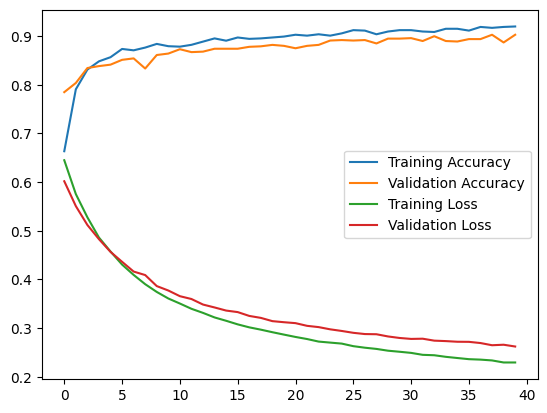

In [4]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Getting input image from user and classify if it is cat or dog image

In [6]:
import numpy as np

# Load a test image
test_image_path = input("Enter the path to the test image: ")
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Make predictions on the test image
predictions = model.predict(test_image)
class_names = ['cats', 'dogs']
predicted_class = class_names[np.argmax(predictions[0])]
print("Predicted class:", predicted_class)

Enter the path to the test image: /content/gdrive/MyDrive/dogs-vs-cats/test/cats/cat.9013.jpg
1/1 [==============================] - 0s 201ms/step
Predicted class: cats
